<a href="https://colab.research.google.com/github/NKASG/Apress-C/blob/master/gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.5 MB/s eta 0:00:00


In [2]:
!pip install opencv-python-headless

In [3]:
import easyocr

# Load the model
reader_en_fr = easyocr.Reader(['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
from IPython.display import Image
import requests

def show_image(image_name):
  return Image(filename=image_name)

def read_text(image_name, model_name, in_line=False):

  # Read the data
  text = model_name.readtext(image_name, detail = 0, paragraph=in_line)

  return '\n'.join(text)

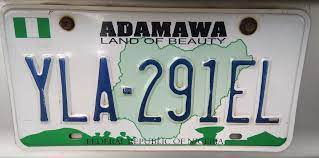

In [22]:
show_image("/content/download.jpg")

In [23]:
en_text = read_text("/content/download.jpg", reader_en_fr)
print(en_text)

EraMaWA
YLA 291EL


In [18]:
lines =en_text.split('\n')

In [19]:
print(lines)

['THE EASTERN HEARTLAND', 'AFR584AA', 'EEDER']


In [20]:
if len(lines) >= 3:
  middle_text = lines[2]
  print(middle_text.strip())

else:
  print('not ngn plate number or retake the infrence')

EEDER


In [21]:
plate_number = middle_text
print(plate_number)

EEDER


In [12]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579 sha256=411824eb46525c32206a62a03e7501931a7320012b99eac04dcdf9340411dc37
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy


In [13]:
import gradio as gr

In [24]:
def generate_text_from_image(input_image):
  en_text = read_text(input_image, reader_en_fr)
  lines =en_text.split('\n')

  if len(lines) >= 3:
    middle_text = lines[2]
    #print(middle_text.strip())

  else:
     print('not ngn plate number or retake the infrence')

  return lines


In [25]:
iface = gr.Interface(
    fn=generate_text_from_image,
    inputs=gr.inputs.Image(),
    outputs="text",
    live=True,)

iface.launch()

<ipython-input-25-90589028094d>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(),
<ipython-input-25-90589028094d>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>